<h2><center>ANZ Australia Data Analytics and Visualisation Virtual Experience Program</center></h2>
<h3><center>Task 1 : Exploratory Data Analysis (Mandatory Task)</center></h3>
<h5><center>Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.</center></h5>
<h4><center>Author : Akshay Pandurang Paunikar</center></h4>

<h5>Background Information:</h5><br>
This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.<br>
The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

<h5>Task:</h5>

 - Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar).
 - Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?
 - Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?
 - Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.
 - For a challenge – what insights can you draw from the location information provided in the dataset?
 - Put together 2-3 slides summarising your most interesting findings to ANZ management.
   

In [147]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [148]:
# Set the working diretory
import io
%cd "E:\FORAGE\ANZ"

E:\FORAGE\ANZ


In [149]:
# Read the dataset
data = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [150]:
# Dimensions of the dataset
data.shape

(12043, 23)

In [151]:
# First 5 records from the dataset
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


<h5>Data Dictionary:</h5>

 - status : denotes the status of the transaction.
 - card_present_flag : did the customer use card for the transaction.
 - bpay_biller_code : unique code of the BPay Transaction done by the customer.
 - account : customer's account number.
 - currency : Australian Dollar.
 - long_lat : transaction's location.
 - txn_description : mode of transaction.
 - merchant_id : merchant's id.
 - merchant_code : unique merchant code for each customers.
 - first_name : customer's first name.
 - balance : customer's account balance.
 - date : transaction date.
 - gender : customer's gender.
 - age : customer's age.
 - merchant_suburb : merchant's district.
 - merchant_state : merchant's state.
 - extraction : extraction of the transaction data.
 - amount : transaction amount.
 - transaction_id : unique transaction id.
 - country : transaction country.
 - customer_id : customer's id.
 - merchant_long_lat : merchant's location.
 - movement : transaction movement type.

In [152]:
# Datatypes present in our data
data.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [153]:
# A brief description about data
data.describe(include='all').T

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17132\4005395035.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
status,12043,2,authorized,7717,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_present_flag,7717.0,NaN,NaN,NaN,NaT,NaT,0.802644,0.398029,0.0,1.0,1.0,1.0,1.0
bpay_biller_code,885.0,3.0,0.0,883.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account,12043,100,ACC-1598451071,578,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,12043,1,AUD,12043,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
long_lat,12043,100,153.41 -27.95,578,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txn_description,12043,6,SALES-POS,3934,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_id,7717,5725,106e1272-44ab-4dcb-a438-dd98e0071e51,14,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_code,883.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
first_name,12043,80,Michael,746,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# Concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [155]:
# Let's check for null values in our data
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

From above basic checks we can see that there are total 12043 rows and 23 columns in our data. Also, we can see that there are lot of missing values in some columns. The Column currency and country has only one unique value so we can drop them as they are not necessary for our analysis.

In [156]:
data = data.drop(['bpay_biller_code', 'merchant_code', 'currency', 'country'], axis=1)
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit


In [157]:
# Now let's check for any duplicates in our data
data.duplicated().sum()

0

As you can see that there are no duplicates present in our data now.

In [158]:
# Now we will convert the column "extraction" into a datetime for our analysis
data['extraction'] = pd.to_datetime(data['extraction'], errors='raise')

In [159]:
# Also we will change the datatype of 'card_present_flag' to int64
data['card_present_flag'] = data['card_present_flag'].astype('Int64', errors='raise')

In [160]:
# Now we will extract Month, Day and Hour from the columns 'date' and 'extraction'
data['month'] = data['date'].dt.month_name()
data['day'] = data['date'].dt.day_name()
data['hour'] = data['extraction'].dt.hour

In [161]:
# Drop the unnecessary columns and see the shape and our new data
data = data.drop(['extraction'], axis=1)
print(data.shape)
data.head()

(12043, 21)


,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_suburb,merchant_state,amount,transaction_id,customer_id,merchant_long_lat,movement,month,day,hour
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,Ashmore,QLD,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,August,Wednesday,1
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,Sydney,NSW,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,August,Wednesday,1
2,authorized,1,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,Sydney,NSW,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,August,Wednesday,1
3,authorized,1,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,Buderim,QLD,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,August,Wednesday,1
4,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,Mermaid Beach,QLD,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,August,Wednesday,1


In [162]:
# Now let's again check for null values
data.isnull().sum()

status                  0
card_present_flag    4326
account                 0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
amount                  0
transaction_id          0
customer_id             0
merchant_long_lat    4326
movement                0
month                   0
day                     0
hour                    0
dtype: int64

In [163]:
data['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

<b>Authorized Transactions</b> are those that still need to be settled by a retailer or service provider. Most transactions stay authorized for 3-5 days.<br>
When a retailer or service provider finishes the work on their end, the transaction will move to <b>Posted Transactions</b>. Posted Transactions are 100% complete.

Now we will create a separate data for 'posted' status.

In [164]:
posted_data = data[data['status']=='posted']
posted_data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_suburb,merchant_state,amount,transaction_id,customer_id,merchant_long_lat,movement,month,day,hour
5,posted,<NA>,ACC-1608363396,151.22 -33.87,PAYMENT,NaN,Robert,1705.43,2018-08-01,M,...,NaN,NaN,163.0,1005b48a6eda4ffd85e9b649dc9467d3,CUS-2688605418,NaN,debit,August,Wednesday,2
9,posted,<NA>,ACC-602667573,151.23 -33.96,INTER BANK,NaN,Michael,466.58,2018-08-01,M,...,NaN,NaN,21.0,798a77869014441b840a7a8a23408332,CUS-2031327464,NaN,debit,August,Wednesday,6
10,posted,<NA>,ACC-2171593283,146.94 -36.04,PAYMENT,NaN,Fernando,4348.50,2018-08-01,M,...,NaN,NaN,27.0,baff17b27b2643c48c84fca7129e9611,CUS-2317998716,NaN,debit,August,Wednesday,6
11,posted,<NA>,ACC-2776252858,144.95 -37.76,PAYMENT,NaN,Kristin,1203.75,2018-08-01,F,...,NaN,NaN,29.0,78a1b6c3a5534d48828d8ed266ba9c2e,CUS-4123612273,NaN,debit,August,Wednesday,6
13,posted,<NA>,ACC-588564840,151.27 -33.76,INTER BANK,NaN,Isaiah,4438.16,2018-08-01,M,...,NaN,NaN,25.0,eaafa602902b4f4194efb96a105dd7ab,CUS-1462656821,NaN,debit,August,Wednesday,7


In [165]:
posted_data.shape

(4326, 21)

In [166]:
posted_data.isnull().sum()

status                  0
card_present_flag    4326
account                 0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
amount                  0
transaction_id          0
customer_id             0
merchant_long_lat    4326
movement                0
month                   0
day                     0
hour                    0
dtype: int64

As you can see that when the 'status' is posted there are null/missing values in our posted_data and the number matches exactly with the null/missing values in our actual data. So we will fill these missing values in a proper way for our further analysis.

In [167]:
data['card_present_flag'].value_counts()

1    6194
0    1523
Name: card_present_flag, dtype: Int64

We will fill the missing values in card_present_flag by its mode i.e 1.

In [168]:
data['card_present_flag'] = data['card_present_flag'].fillna(data['card_present_flag'].mode()[0])

For the columns 'merchant_id', 'merchant_suburb', 'merchant_state', 'merchant_long_lat' we will fill the missing values by 'empty'

In [169]:
data['merchant_id'] = data['merchant_id'].fillna('empty')
data['merchant_suburb'] = data['merchant_suburb'].fillna('empty')
data['merchant_state'] = data['merchant_state'].fillna('empty')
data['merchant_long_lat'] = data['merchant_long_lat'].fillna('empty')

In [170]:
# Let's check for null values in our data
data.isnull().sum()

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
amount               0
transaction_id       0
customer_id          0
merchant_long_lat    0
movement             0
month                0
day                  0
hour                 0
dtype: int64

Now there are no missing values in our data.

Now as you can see that we have and 'age' column which we can use to create age bins so that we can analyze our data based on different age groups.

For this, we will use the pandas cut function pd.cut() which will convert ages to groups of age ranges.

In [171]:
data['age_group'] = pd.cut(data['age'], [0,20,30,40,50,60,99999], labels=['<20','20-30','30-40','40-50','50-60','>60'])

In [172]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,amount,transaction_id,customer_id,merchant_long_lat,movement,month,day,hour,age_group
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,August,Wednesday,1,20-30
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,August,Wednesday,1,20-30
2,authorized,1,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,August,Wednesday,1,30-40
3,authorized,1,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,August,Wednesday,1,30-40
4,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,August,Wednesday,1,20-30


<h4>Now we will use matplotlib and seaborn to draw some meaningful insights from our data.</h4>

<h4>First, we will analyze categorical columns using Countplots, Pie Charts and Line Charts</h4>

In [173]:
# Column 'status'
print(data['status'].value_counts())
print()
# Let's see the same values in %
print("The Count of Status of transaction in % is :")
round((data['status'].value_counts()/len(data['status'])*100),2)

authorized    7717
posted        4326
Name: status, dtype: int64

The Count of Status of transaction in % is :


authorized    64.08
posted        35.92
Name: status, dtype: float64

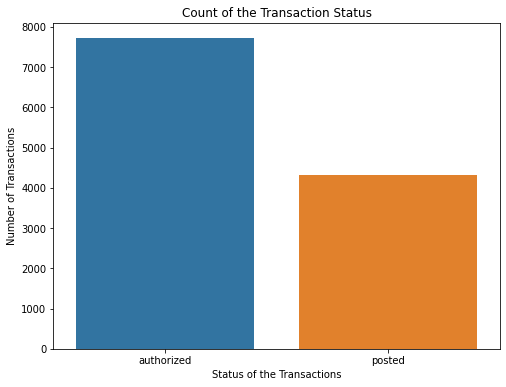

In [174]:
# Let's visualize above information using a Countplot
plt.figure(figsize=(8,6))
sns.countplot(x='status', data=data)
plt.xlabel('Status of the Transactions')
plt.ylabel('Number of Transactions')
plt.title('Count of the Transaction Status')
plt.show()

In [175]:
# Column 'card_present_flag'
print(data['card_present_flag'].value_counts())
print()

# Let's see the same values in %
print("The Count of whether the Card is used or not used during the transaction in % is :")
round((data['card_present_flag'].value_counts()/len(data['card_present_flag'])*100),2)

1    10520
0     1523
Name: card_present_flag, dtype: Int64

The Count of whether the Card is used or not used during the transaction in % is :


1    87.35
0    12.65
Name: card_present_flag, dtype: Float64

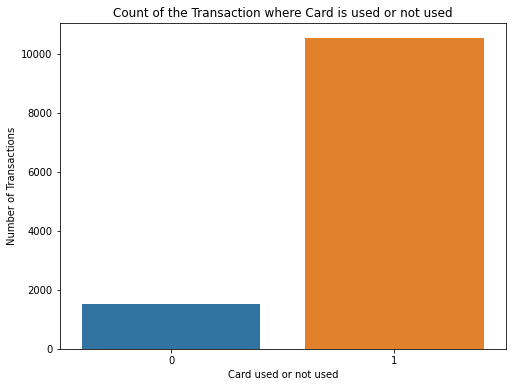

In [176]:
# Let's visualize above information using a Countplot
plt.figure(figsize=(8,6))
sns.countplot(x='card_present_flag', data=data)
plt.xlabel('Card used or not used')
plt.ylabel('Number of Transactions')
plt.title('Count of the Transaction where Card is used or not used')
plt.show()

In [177]:
# Column 'txn_description'
print(data['txn_description'].value_counts())
print()

# Let's see the same values in %
print("The Count of various Mode of Transaction in % is :")
round((data['txn_description'].value_counts()/len(data['txn_description'])*100),2)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

The Count of various Mode of Transaction in % is :


SALES-POS     32.67
POS           31.41
PAYMENT       21.59
PAY/SALARY     7.33
INTER BANK     6.16
PHONE BANK     0.84
Name: txn_description, dtype: float64

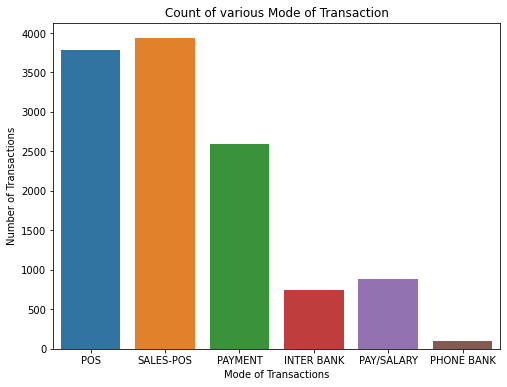

In [178]:
# Let's visualize above information using a Countplot
plt.figure(figsize=(8,6))
sns.countplot(x='txn_description', data=data)
plt.xlabel('Mode of Transactions')
plt.ylabel('Number of Transactions')
plt.title('Count of various Mode of Transaction')
plt.show()

In [179]:
# Column 'gender'
print(data['gender'].value_counts())
print()

# Let's see the same values in %
print("The Count of Transactions made by Male/Female in % is :")
round((data['gender'].value_counts()/len(data['gender'])*100),2)

M    6285
F    5758
Name: gender, dtype: int64

The Count of Transactions made by Male/Female in % is :


M    52.19
F    47.81
Name: gender, dtype: float64

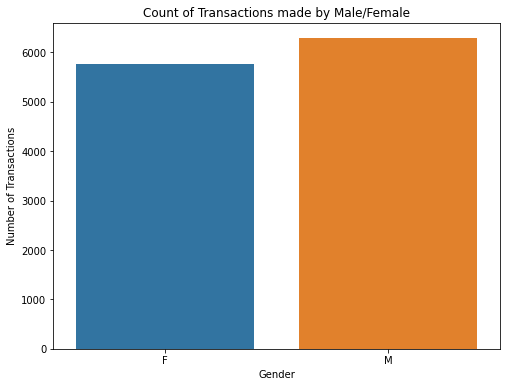

In [180]:
# Let's visualize above information using a Countplot
plt.figure(figsize=(8,6))
sns.countplot(x='gender', data=data)
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.title('Count of Transactions made by Male/Female')
plt.show()

In [181]:
# Column 'age_group'
print(data['age_group'].value_counts())
print()

# Let's see the same values in %
print("The Count of Transactions made by different Age Group in % is :")
round((data['age_group'].value_counts()/len(data['age_group'])*100),2)

20-30    5071
30-40    3405
<20      1900
40-50    1293
>60       224
50-60     150
Name: age_group, dtype: int64

The Count of Transactions made by different Age Group in % is :


20-30    42.11
30-40    28.27
<20      15.78
40-50    10.74
>60       1.86
50-60     1.25
Name: age_group, dtype: float64

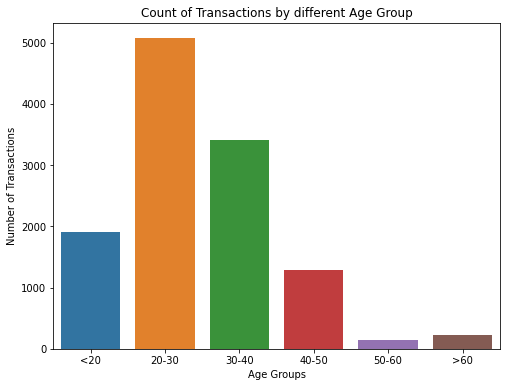

In [182]:
# Let's visualize above information using a Countplot
plt.figure(figsize=(8,6))
sns.countplot(x='age_group', data=data)
plt.xlabel('Age Groups')
plt.ylabel('Number of Transactions')
plt.title('Count of Transactions by different Age Group')
plt.show()

In [183]:
# Column 'merchant_suburb'
# Since we have missing values replaced as 'empty' we will ignore this values while analyzing 'merchant_suburb'
merchant_suburb = data[data['merchant_suburb']!='empty']
print(merchant_suburb['merchant_suburb'].value_counts().head(10))
print()

# Let's see the same values in %
print("The Top 10 Count of Transactions according to different merchant district in % is :")
round((merchant_suburb['merchant_suburb'].value_counts().head(10)/len(merchant_suburb['merchant_suburb'])*100),2)

Melbourne        255
Sydney           233
Southport         82
Brisbane City     79
Chatswood         55
Perth             45
Adelaide          44
Mount Gambier     41
Broadbeach        41
Parramatta        39
Name: merchant_suburb, dtype: int64

The Top 10 Count of Transactions according to different merchant district in % is :


Melbourne        3.30
Sydney           3.02
Southport        1.06
Brisbane City    1.02
Chatswood        0.71
Perth            0.58
Adelaide         0.57
Mount Gambier    0.53
Broadbeach       0.53
Parramatta       0.51
Name: merchant_suburb, dtype: float64

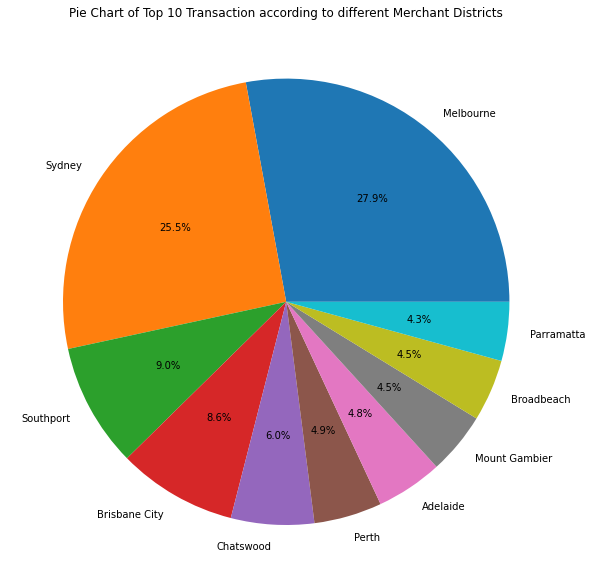

In [184]:
# Let's visualize above information using a Pie Chart
merchant_suburb_y = merchant_suburb['merchant_suburb'].value_counts().head(10)

plt.figure(figsize=(10,15))
mylabels = ["Melbourne", "Sydney", "Southport", "Brisbane City", "Chatswood", 
            "Perth", "Adelaide", "Mount Gambier", "Broadbeach", "Parramatta"]

plt.pie(merchant_suburb_y, labels=mylabels, autopct='%1.1f%%')
plt.title("Pie Chart of Top 10 Transaction according to different Merchant Districts")
plt.show()

In [185]:
# Column 'merchant_state'
# Since we have missing values replaced as 'empty' we will ignore this values while analyzing 'merchant_state'
merchant_state = data[data['merchant_state']!='empty']
print(merchant_state['merchant_state'].value_counts())
print()

# Let's see the same values in %
print("The Count of Transactions according to different merchant state in % is :")
round((merchant_state['merchant_state'].value_counts().head(10)/len(merchant_state['merchant_state'])*100),2)

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

The Count of Transactions according to different merchant state in % is :


NSW    28.11
VIC    27.61
QLD    20.16
WA     14.25
SA      5.38
NT      2.66
ACT     0.95
TAS     0.88
Name: merchant_state, dtype: float64

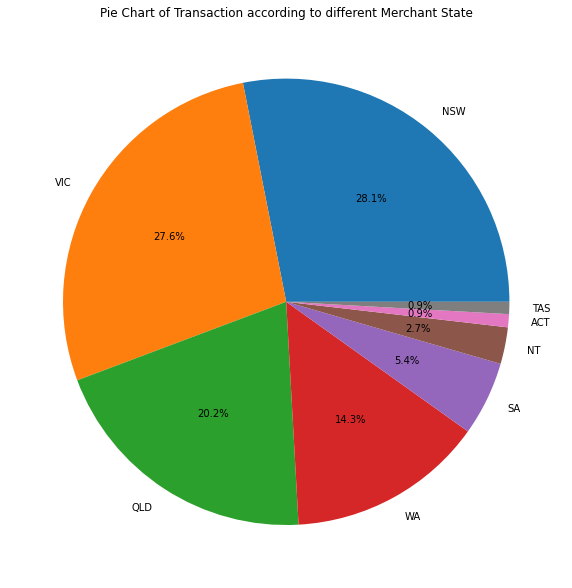

In [186]:
# Let's visualize above information using a Pie Chart
merchant_state_y = merchant_state['merchant_state'].value_counts()

plt.figure(figsize=(10,15))
mylabels = ["NSW", "VIC", "QLD", "WA", "SA", "NT", "ACT", "TAS"]

plt.pie(merchant_state_y, labels=mylabels, autopct='%1.1f%%')
plt.title("Pie Chart of Transaction according to different Merchant State")
plt.show()

In [187]:
# Column 'movement'
print(data['movement'].value_counts())
print()

# Let's see the same values in %
print("The Count of Transactions for Debit/Credit in % is :")
round((data['movement'].value_counts().head(10)/len(data['movement'])*100),2)

debit     11160
credit      883
Name: movement, dtype: int64

The Count of Transactions for Debit/Credit in % is :


debit     92.67
credit     7.33
Name: movement, dtype: float64

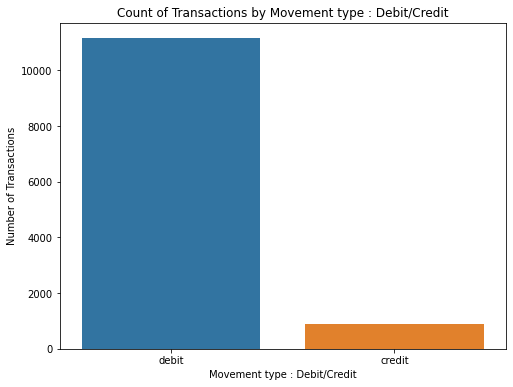

In [188]:
# Let's visualize above information using a Countplot
plt.figure(figsize=(8,6))
sns.countplot(x='movement', data=data)
plt.xlabel('Movement type : Debit/Credit')
plt.ylabel('Number of Transactions')
plt.title('Count of Transactions by Movement type : Debit/Credit')
plt.show()

In [189]:
# Column 'month'
print(data['month'].value_counts())
print()

# Let's see the same values in %
print("The Count of Transactions by Months in % is :")
round((data['month'].value_counts()/len(data['month'])*100),2)

October      4087
September    4013
August       3943
Name: month, dtype: int64

The Count of Transactions by Months in % is :


October      33.94
September    33.32
August       32.74
Name: month, dtype: float64

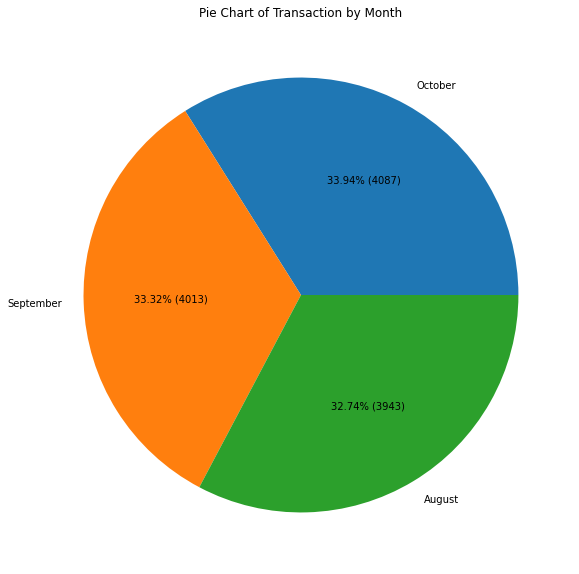

In [190]:
# Let's visualize above information using a Pie Chart
month_y = data['month'].value_counts()

plt.figure(figsize=(10,10))
mylabels = ["October", "September", "August"]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(month_y.values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(month_y, labels=mylabels, autopct=make_autopct(month_y.values))
plt.title("Pie Chart of Transaction by Month")
plt.show()

In [191]:
# Column 'day'
print(data['day'].value_counts())
print()

# Let's see the same values in %
print("The Count of Transactions by day in % is :")
round((data['day'].value_counts()/len(data['day'])*100),2)

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: day, dtype: int64

The Count of Transactions by day in % is :


Friday       17.21
Wednesday    17.13
Thursday     14.95
Saturday     14.19
Sunday       12.87
Tuesday      12.35
Monday       11.29
Name: day, dtype: float64

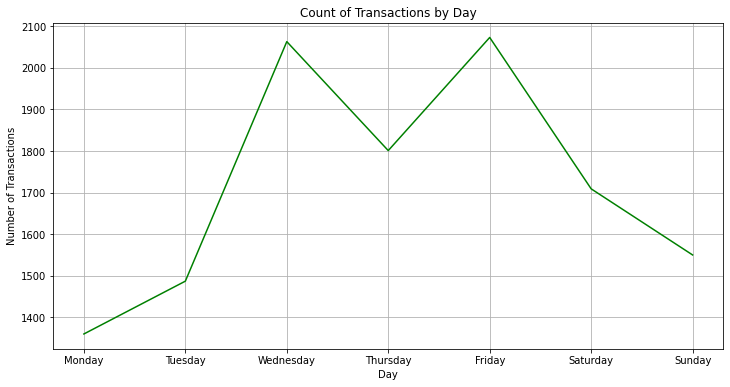

In [192]:
# Let's visualize above information using a Line Chart
day = data['day'].value_counts().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(12,6))
day.plot(kind='line', color='g')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.title('Count of Transactions by Day')
plt.grid(True)
plt.show()

In [193]:
# Column 'hour'
print(data['hour'].value_counts())
print()

# Let's see the same values in %
print("The Count of Transactions at different time during the day in % is :")
round((data['hour'].value_counts()/len(data['hour'])*100),2)

9     1106
11     941
17     815
14     757
21     741
15     728
10     615
20     598
13     558
19     548
8      547
12     543
16     516
22     458
23     426
18     383
4      309
7      266
6      249
1      214
2      212
5      209
3      196
0      108
Name: hour, dtype: int64

The Count of Transactions at different time during the day in % is :


9     9.18
11    7.81
17    6.77
14    6.29
21    6.15
15    6.05
10    5.11
20    4.97
13    4.63
19    4.55
8     4.54
12    4.51
16    4.28
22    3.80
23    3.54
18    3.18
4     2.57
7     2.21
6     2.07
1     1.78
2     1.76
5     1.74
3     1.63
0     0.90
Name: hour, dtype: float64

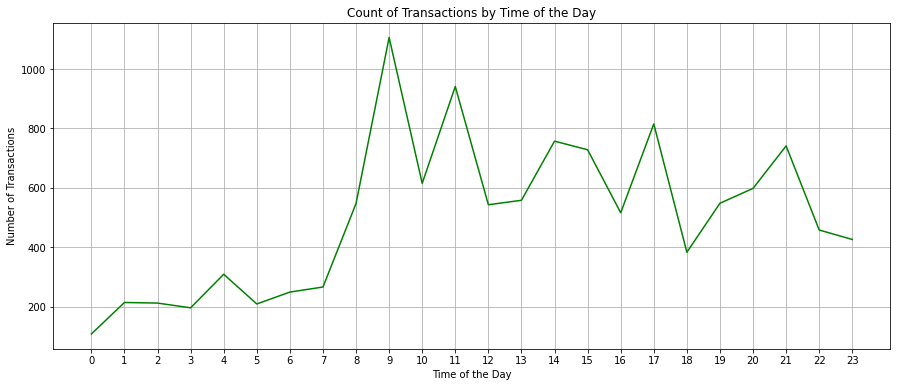

In [194]:
# Let's visualize above information using a Line Chart
daytime = data['hour'].value_counts().reindex(range(0,24))

plt.figure(figsize=(15,6))
daytime.plot(kind='line', color='g')
plt.xlabel('Time of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0,24))
plt.title('Count of Transactions by Time of the Day')
plt.grid(True)
plt.show()

In [195]:
# Let's see on which day we observed maximum number of transactions during 3 months
data.groupby(['date'])['date'].count().sort_values(ascending=False)

date
2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

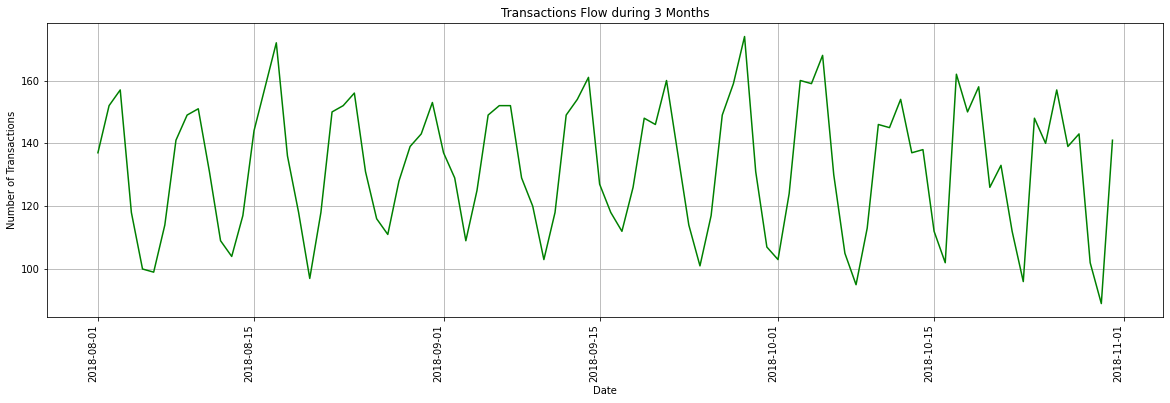

In [196]:
# Transaction flow during 3 Months
plt.figure(figsize=(20,6))
data.groupby(['date'])['date'].count().plot(kind='line', color='g')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.title('Transactions Flow during 3 Months')
plt.grid(True)
plt.show()

<h4>Observations :</h4>
    
 - Most of the transactions were <b>Authorized - 64.08%</b> and rest were Posted.
 - Most of the transactions were done by <b>Cards(Debit/Credit cards - 87.35%.</b>
 - The Maximum number of transactions are done via <b>Transaction Mode : SALES - POS - 32.67% & POS - 31.41%.</b>
 - Considering Gender, <b>Males - 52.19%</b> did more transactions as compared to Females.
 - People between <b>Age Group : 20-30 - 42.11%</b> did highest number of transactions and <b>Age Group : 50-60 - 1.25%</b> did lowest number of transactions.
 - Considering Top 10 District according to transaction counts, <b>Melbourne - 27.9%</b> has highest and <b>Parramatta - 4.3%</b> has lowest number of transactions.
 - Highest number of Transactions are carried out in <b>State : NSW - 28.11%</b> & Lowest in <b>State : TAS - 0.88%.</b>
 - Most of the transactions are of <b>Transaction Movement Type : Debit - 92.67%</b> and rest are Credit.
 - There is a steady increase in the number of transaction after each passing month.
 - <b>Friday - 17.21%</b> & <b>Wednesday - 17.13%</b> recorded highest and <b>Monday - 11.29%</b> recorded lowest number of transactions.
 - Highest number of transactions are done during the time - 9 a.m., 11 a.m. and 5 p.m. and Lowest at time - 12 a.m., 3 a.m. and 5 a.m.
 - Considering the data over the period of 3 months, the maximum transaction were recorded on <b>2018-09-28 : 174</b> and minimum on <b>2018-10-30 : 89.</b>

<h4>Now we will analyze numerical columns using Barplots, Pie Charts and Line Charts</h4>

In [197]:
# Average Transaction Amount according to Status of Transactions
data.groupby(['status'])['amount'].mean().round(2).sort_values(ascending=False)

status
posted        451.55
authorized     40.15
Name: amount, dtype: float64

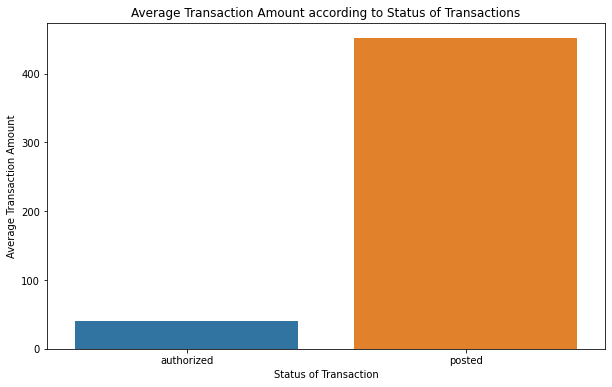

In [198]:
# Lets visualize above using a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='status', y='amount', data=data, ci=None, estimator=np.mean)
plt.xlabel('Status of Transaction')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount according to Status of Transactions')
plt.show()

In [199]:
# Average Transaction Amount according to Mode of Transactions
data.groupby(['txn_description'])['amount'].mean().round(2).sort_values(ascending=False)

txn_description
PAY/SALARY    1898.73
PHONE BANK     106.10
INTER BANK      86.70
PAYMENT         77.61
POS             40.41
SALES-POS       39.91
Name: amount, dtype: float64

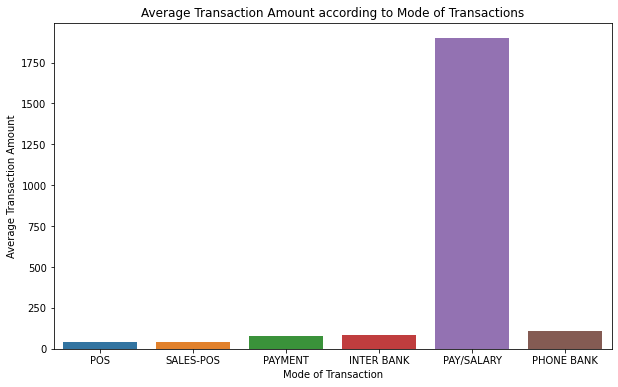

In [200]:
# Lets visualize above using a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='txn_description', y='amount', data=data, ci=None, estimator=np.mean)
plt.xlabel('Mode of Transaction')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount according to Mode of Transactions')
plt.show()

In [201]:
# Genderwise Total Transaction Amount by State
merchant_state.groupby(['merchant_state', 'gender'])['amount'].sum()

merchant_state  gender
ACT             F          1657.44
                M          3219.24
NSW             F         41430.88
                M         60590.89
NT              F          8741.42
                M           427.47
QLD             F         28611.05
                M         24872.40
SA              F         11349.73
                M          5426.84
TAS             F           622.72
                M          1340.21
VIC             F         38626.01
                M         48957.99
WA              F         19908.15
                M         14083.91
Name: amount, dtype: float64

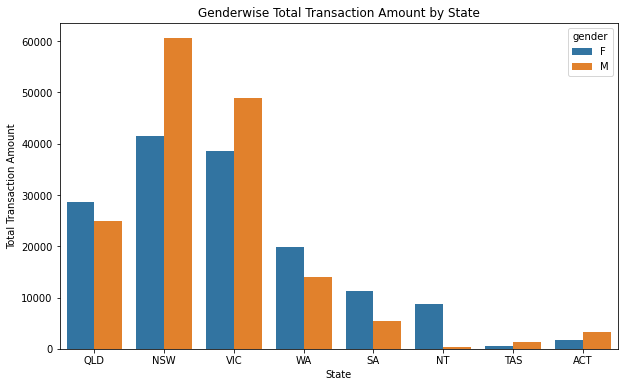

In [202]:
# Lets visualize above using a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='merchant_state', y='amount', data=merchant_state, hue='gender', ci=None, estimator=np.sum)
plt.xlabel('State')
plt.ylabel('Total Transaction Amount')
plt.title('Genderwise Total Transaction Amount by State')
plt.show()

In [203]:
# Genderwise Total Transaction Amount by Age Group
data.groupby(['age_group', 'gender'])['amount'].sum()

age_group  gender
<20        F         179022.73
           M         163096.06
20-30      F         337548.44
           M         501837.23
30-40      F         301440.00
           M         396358.69
40-50      F         125455.07
           M         169900.95
50-60      F          16268.97
           M          32243.17
>60        F          10587.42
           M          29525.47
Name: amount, dtype: float64

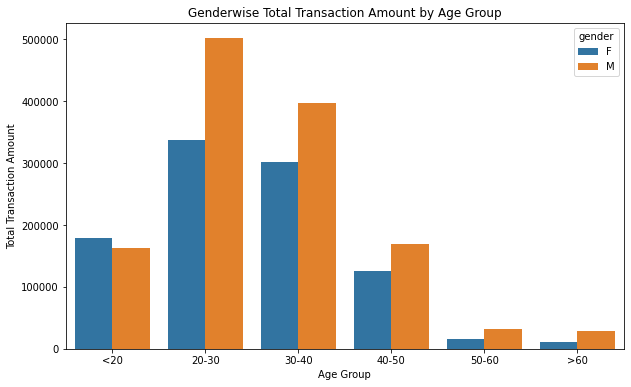

In [204]:
# Lets visualize above using a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='age_group', y='amount', data=data, hue='gender', ci=None, estimator=np.sum)
plt.xlabel('Age Group')
plt.ylabel('Total Transaction Amount')
plt.title('Genderwise Total Transaction Amount by Age Group')
plt.show()

In [205]:
# Genderwise Total Transaction Amount by Month
data.groupby(['month', 'gender'])['amount'].sum()

month      gender
August     F         309397.55
           M         420537.97
October    F         347430.62
           M         455367.85
September  F         313494.46
           M         417055.75
Name: amount, dtype: float64

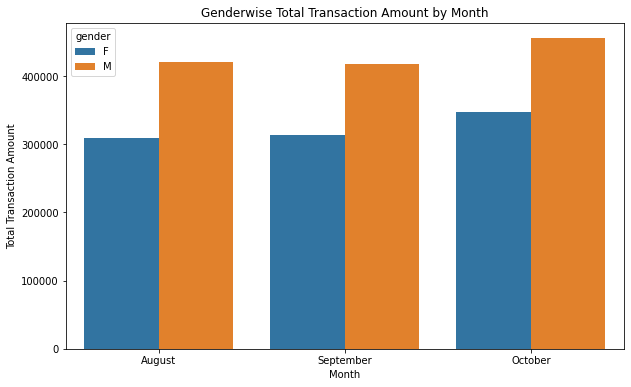

In [206]:
# Lets visualize above using a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='amount', data=data, hue='gender', ci=None, estimator=np.sum)
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.title('Genderwise Total Transaction Amount by Month')
plt.show()

In [207]:
# Genderwise Average Transaction Amount by Day
data.groupby(['day', 'gender'])['amount'].sum()

day        gender
Friday     F         213378.86
           M         303530.98
Monday     F         202600.39
           M         304980.17
Saturday   F          36124.99
           M          56877.57
Sunday     F          39932.72
           M          42241.84
Thursday   F         113708.97
           M         217693.80
Tuesday    F         156706.67
           M         172777.52
Wednesday  F         207870.03
           M         194859.69
Name: amount, dtype: float64

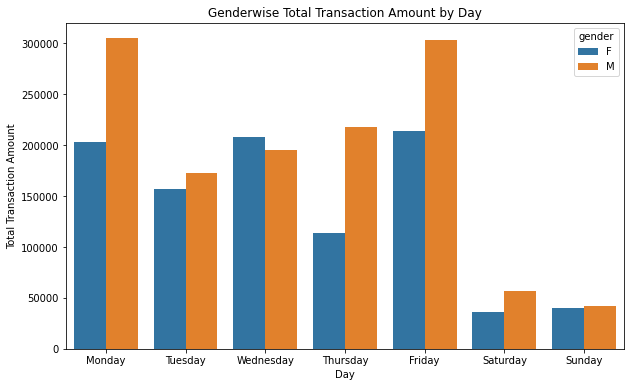

In [208]:
Gender_Day = data.groupby(['day','gender'])['amount'].sum().reset_index()
order = ['Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
Gender_Day['day'] = pd.Categorical(Gender_Day['day'],order)
Gender_Day = Gender_Day.groupby(['day','gender'])['amount'].sum().reset_index()

# Lets visualize above using a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='day', y='amount', data=Gender_Day, hue='gender', ci=None, estimator=np.sum)
plt.xlabel('Day')
plt.ylabel('Total Transaction Amount')
# plt.xticks(range(0,7),["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title('Genderwise Total Transaction Amount by Day')
plt.show()

In [209]:
# Genderwise Average Transactions Amount by Transaction Movement Type
data.groupby(['movement','gender'])['amount'].mean()

movement  gender
credit    F         1679.370477
          M         2096.811681
debit     F           49.946881
          M           54.980407
Name: amount, dtype: float64

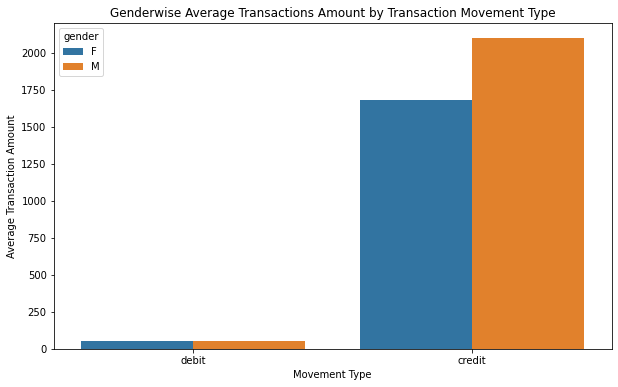

In [210]:
# Lets visualize above using a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='movement', y='amount', data=data, hue='gender', ci=None, estimator=np.mean)
plt.xlabel('Movement Type')
plt.ylabel('Average Transaction Amount')
plt.title('Genderwise Average Transactions Amount by Transaction Movement Type')
plt.show()

In [211]:
# Average Transaction Amount by Time of the Day
data.groupby(['hour'])['amount'].mean()

hour
0      28.274907
1      48.716402
2      75.269764
3      84.725918
4      61.301845
5      64.524641
6      59.205261
7      72.927256
8      43.749159
9      42.301130
10     52.810130
11    315.735600
12    374.033591
13    665.238692
14    258.750225
15    233.858901
16    337.369244
17    587.677902
18     53.568407
19     54.528923
20     46.814900
21     44.511484
22     52.292445
23     50.653333
Name: amount, dtype: float64

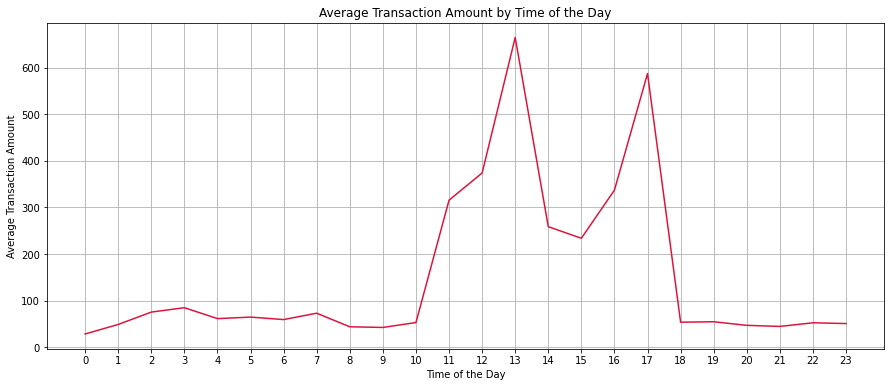

In [212]:
# Let's visualize above information using a Line Chart
plt.figure(figsize=(15,6))
data.groupby(['hour'])['amount'].mean().plot(kind='line', color='crimson')
plt.xlabel('Time of the Day')
plt.ylabel('Average Transaction Amount')
plt.xticks(range(0,24))
plt.title('Average Transaction Amount by Time of the Day')
plt.grid(True)
plt.show()

In [213]:
# Average Transaction Amount by Date
data.groupby(['date'])['amount'].mean().sort_values(ascending=False)

date
2018-08-20    497.323093
2018-10-15    463.777500
2018-08-06    427.153838
2018-10-01    396.340097
2018-10-29    377.932745
                 ...    
2018-08-12     40.340550
2018-09-02     40.295891
2018-08-25     39.731221
2018-08-26     36.801638
2018-10-20     33.854048
Name: amount, Length: 91, dtype: float64

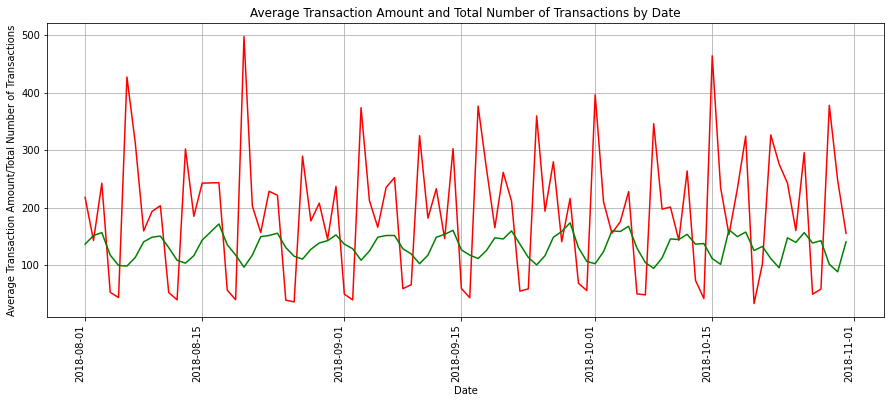

In [214]:
# Let's visualize above information using a Line Chart
plt.figure(figsize=(15,6))
data.groupby(['date'])['amount'].mean().plot(kind='line', color='red')
data.groupby(['date'])['date'].count().plot(kind='line', color='green')
plt.xlabel('Date')
plt.ylabel('Average Transaction Amount/Total Number of Transactions')
plt.title('Average Transaction Amount and Total Number of Transactions by Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [215]:
# Total Transaction Amount across States
merchant_state.groupby(['merchant_state'])['amount'].sum().sort_values(ascending=False).head(10)

merchant_state
NSW    102021.77
VIC     87584.00
QLD     53483.45
WA      33992.06
SA      16776.57
NT       9168.89
ACT      4876.68
TAS      1962.93
Name: amount, dtype: float64

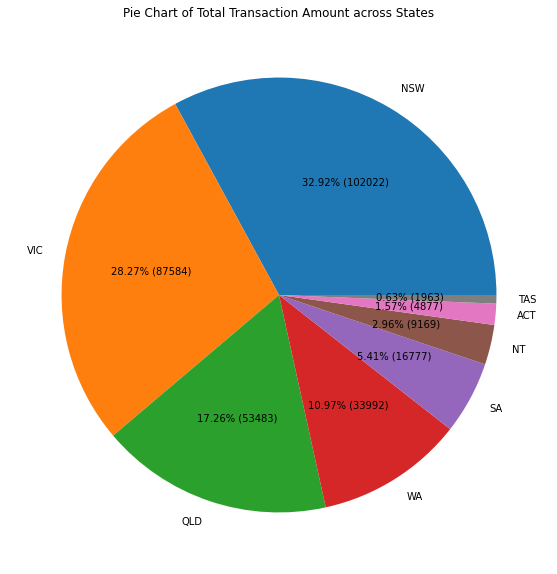

In [216]:
# Let's visualize above information using a Pie Chart
State_amount = merchant_state.groupby(['merchant_state'])['amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,10))
mylabels = ["NSW", "VIC", "QLD", "WA", "SA", "NT", "ACT", "TAS"]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(State_amount.values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(State_amount,labels=mylabels,autopct=make_autopct(State_amount.values))
plt.title("Pie Chart of Total Transaction Amount across States")
plt.show()

In [217]:
# Top 10 Customers with Total Transaction Amount
data.groupby(['customer_id','first_name'])['amount'].sum().sort_values(ascending=False).head(10)

customer_id     first_name
CUS-2738291516  Kenneth       45409.16
CUS-3142625864  Ricky         42688.30
CUS-1816693151  Tim           40215.54
CUS-2155701614  Linda         37943.79
CUS-261674136   Kenneth       36786.13
CUS-883482547   Michelle      36639.41
CUS-4142663097  Sandra        36588.25
CUS-527400765   Natasha       36543.61
CUS-1196156254  Jessica       36050.72
CUS-2031327464  Michael       35832.97
Name: amount, dtype: float64

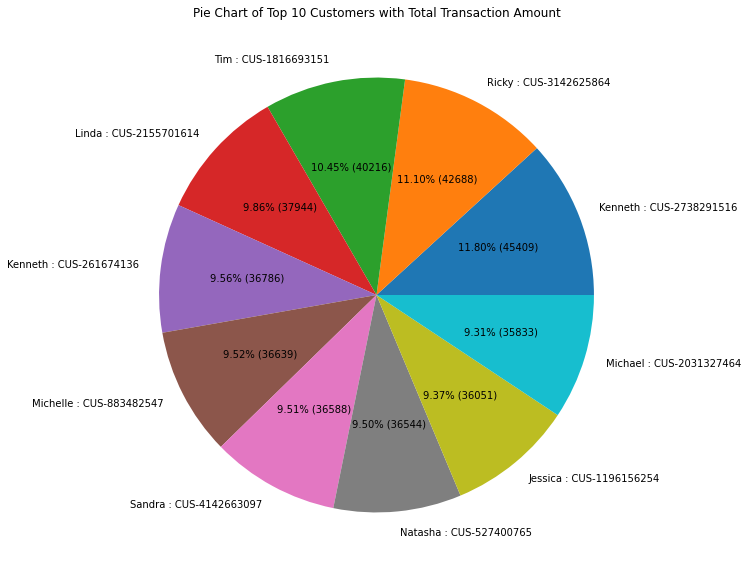

In [218]:
# Let's visualize above information using a Pie Chart
Top10Customers_amount = data.groupby(['customer_id','first_name'])['amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,10))
mylabels = ["Kenneth : CUS-2738291516", "Ricky : CUS-3142625864", "Tim : CUS-1816693151", "Linda : CUS-2155701614", 
            "Kenneth : CUS-261674136", "Michelle : CUS-883482547", "Sandra : CUS-4142663097", "Natasha : CUS-527400765", 
            "Jessica : CUS-1196156254", "Michael : CUS-2031327464"]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(Top10Customers_amount.values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(Top10Customers_amount,labels=mylabels,autopct=make_autopct(Top10Customers_amount.values))
plt.title("Pie Chart of Top 10 Customers with Total Transaction Amount")
plt.show()

In [219]:
# Top 10 Customers with Total Balance
data.groupby(['customer_id','first_name'])['balance'].sum().sort_values(ascending=False).head(10)

customer_id     first_name 
CUS-527400765   Natasha        29983336.71
CUS-2370108457  Patrick        17671502.33
CUS-3117610635  Christopher     8547297.74
CUS-2819545904  Brian           7011950.25
CUS-2663907001  Craig           6505599.14
CUS-1196156254  Jessica         5456746.27
CUS-1816693151  Tim             5102791.53
CUS-1609060617  Michael         4591549.46
CUS-2059096722  Michael         4226400.33
CUS-3462882033  Michael         3985131.11
Name: balance, dtype: float64

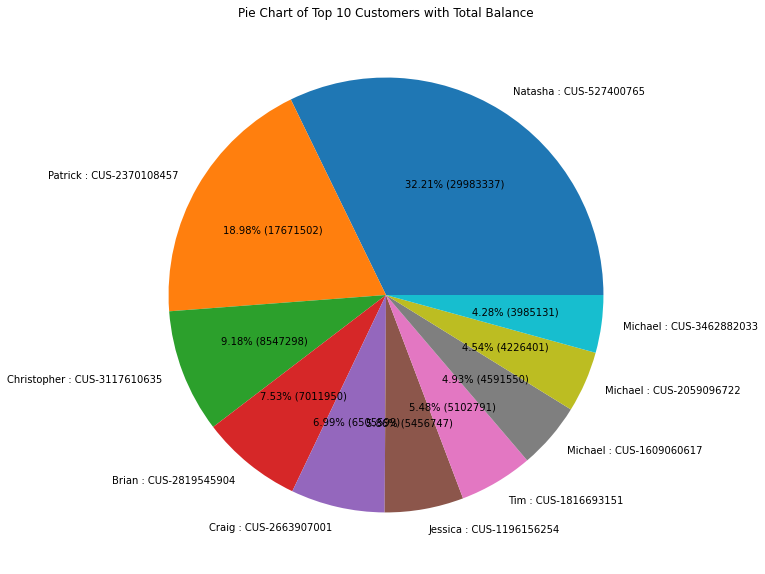

In [220]:
# Let's visualize above information using a Pie Chart
Top10Customers_balance = data.groupby(['customer_id','first_name'])['balance'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,10))
mylabels = ["Natasha : CUS-527400765", "Patrick : CUS-2370108457", "Christopher : CUS-3117610635", "Brian : CUS-2819545904", 
            "Craig : CUS-2663907001", "Jessica : CUS-1196156254", "Tim : CUS-1816693151", "Michael : CUS-1609060617", 
            "Michael : CUS-2059096722", "Michael : CUS-3462882033"]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(Top10Customers_balance.values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(Top10Customers_balance,labels=mylabels,autopct=make_autopct(Top10Customers_balance.values))
plt.title("Pie Chart of Top 10 Customers with Total Balance")
plt.show()

<h4>Observations:</h4>

 - The average transaction amount for <b>Posted - 451.55</b> is more than <b>Authorized - 40.15</b>.
 - The average transaction amount for mode of transaction type <b>PAY/SALARY - 1898.73</b> is highest and <b>SALES-POS - 39.91</b> is lowest.
 - The total transaction amount is higher for <b>Males</b> in <b>State : NSW, VIC, TAS, ACT</b> and for <b>Females</b> in <b>State : QLD, WA, SA, NT.</b>
 - The <b>Females</b> from <b>Age Group : <20</b> has higher transaction amount than Males of the same age group compared to rest other Age Groups.
 - The Genderwise total transaction amount by month is higher for Males in each month than Females.
 - The Genderwise total transaction amount by day is higher for Females only on Wednesday and is higher for Males on the rest of the other days.
 - The Genderwise Average Transactions Amount by Transaction Movement Type is higher for Males than Females.
 - The Average Transaction Amount by Time of the Day is higher during 11 a.m. to 5 p.m.
 - The Average Transaction Amount by Date was highest on <b>20th August 2018</b> and Lowest on <b>20th October 2018.</b>
 - Total Transaction Amount across States is highest for <b>State : NSW - 102021.77</b> and Lowest for <b>State : TAS - 1962.93</b>
 - The Customer <b>Kenneth : CUS-2738291516 - 45409.16</b> has highest Total Transaction Amount and Customer <b>Natasha - CUS-527400765 - 29983336.71</b> has highest account balance.

<h3><center>Task 2 : Predictive Analytics (Mandatory Task)</center></h3>
<h5><center>Explore correlations between customer attributes, build a regression and a decision-tree prediction model based on your findings.</center></h5>

<h4>Task:</h4>

 - Using the same transaction dataset, identify the annual salary for each customer.
 - Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.
 - Build a simple regression model to predict the annual salary for each customer using the attributes you identified above.
 - How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?
 - For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [221]:
# Import required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [222]:
# Let's see our data first
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,amount,transaction_id,customer_id,merchant_long_lat,movement,month,day,hour,age_group
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,August,Wednesday,1,20-30
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,August,Wednesday,1,20-30
2,authorized,1,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,August,Wednesday,1,30-40
3,authorized,1,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,August,Wednesday,1,30-40
4,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,August,Wednesday,1,20-30


In [223]:
# Dimensions of the data
data.shape

(12043, 22)

In [224]:
# Datatypes present
data.dtypes

status                       object
card_present_flag             Int64
account                      object
long_lat                     object
txn_description              object
merchant_id                  object
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
amount                      float64
transaction_id               object
customer_id                  object
merchant_long_lat            object
movement                     object
month                        object
day                          object
hour                          int64
age_group                  category
dtype: object

In [225]:
# Check for null/missing values
data.isnull().sum()

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
amount               0
transaction_id       0
customer_id          0
merchant_long_lat    0
movement             0
month                0
day                  0
hour                 0
age_group            0
dtype: int64

In [226]:
# Check for unique values in Modes of Transactions
data['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

Here we are only interested in PAY/SALARY so we will filter the data accordingly.

In [227]:
# New data with salary information
salary_data = data[data['txn_description']=='PAY/SALARY']
print(salary_data.shape)
salary_data.head()

(883, 22)


,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,amount,transaction_id,customer_id,merchant_long_lat,movement,month,day,hour,age_group
50,posted,1,ACC-588564840,151.27 -33.76,PAY/SALARY,empty,Isaiah,8342.11,2018-08-01,M,...,empty,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,empty,credit,August,Wednesday,11,20-30
61,posted,1,ACC-1650504218,145.01 -37.93,PAY/SALARY,empty,Marissa,2040.58,2018-08-01,F,...,empty,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,empty,credit,August,Wednesday,12,20-30
64,posted,1,ACC-3326339947,151.18 -33.80,PAY/SALARY,empty,Eric,3158.51,2018-08-01,M,...,empty,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,empty,credit,August,Wednesday,12,20-30
68,posted,1,ACC-3541460373,145.00 -37.83,PAY/SALARY,empty,Jeffrey,2517.66,2018-08-01,M,...,empty,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,empty,credit,August,Wednesday,13,20-30
70,posted,1,ACC-2776252858,144.95 -37.76,PAY/SALARY,empty,Kristin,2271.79,2018-08-01,F,...,empty,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,empty,credit,August,Wednesday,13,40-50


In [228]:
# Unique customer in the data
salary_data['customer_id'].value_counts()

CUS-2500783281    14
CUS-326006476     14
CUS-4123612273    14
CUS-2487424745    14
CUS-1646621553    14
                  ..
CUS-423725039      3
CUS-51506836       2
CUS-497688347      2
CUS-1739931018     2
CUS-2178051368     2
Name: customer_id, Length: 100, dtype: int64

There are 100 unique customers in our data.

In [229]:
# Calculate annual salary for employees
salary = pd.DataFrame(salary_data.groupby(['customer_id'])['amount'].mean().round(2)*12)
salary = salary.reset_index()
salary

,customer_id,amount
0,CUS-1005756958,11645.64
1,CUS-1117979751,42943.80
2,CUS-1140341822,22998.12
3,CUS-1147642491,20536.68
4,CUS-1196156254,46844.76
...,...,...
95,CUS-72755508,8703.84
96,CUS-809013380,12444.84
97,CUS-860700529,21703.44
98,CUS-880898248,17207.76


In [230]:
# Merge the 2 datasets into one
new_data = pd.merge(left=salary_data, right=salary, how='left', on=['customer_id'])
print(new_data.shape)
new_data.head()

(883, 23)


,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,amount_x,transaction_id,customer_id,merchant_long_lat,movement,month,day,hour,age_group,amount_y
0,posted,1,ACC-588564840,151.27 -33.76,PAY/SALARY,empty,Isaiah,8342.11,2018-08-01,M,...,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,empty,credit,August,Wednesday,11,20-30,46847.40
1,posted,1,ACC-1650504218,145.01 -37.93,PAY/SALARY,empty,Marissa,2040.58,2018-08-01,F,...,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,empty,credit,August,Wednesday,12,20-30,19517.76
2,posted,1,ACC-3326339947,151.18 -33.80,PAY/SALARY,empty,Eric,3158.51,2018-08-01,M,...,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,empty,credit,August,Wednesday,12,20-30,11800.32
3,posted,1,ACC-3541460373,145.00 -37.83,PAY/SALARY,empty,Jeffrey,2517.66,2018-08-01,M,...,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,empty,credit,August,Wednesday,13,20-30,16896.96
4,posted,1,ACC-2776252858,144.95 -37.76,PAY/SALARY,empty,Kristin,2271.79,2018-08-01,F,...,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,empty,credit,August,Wednesday,13,40-50,12816.48


In [231]:
# Renaming the columns
new_data.rename(columns={'amount_y':'salary', 'amount_x':'amount'}, inplace=True)

Now, we will remove those columns which have only one unique value.

In [232]:
new_data['card_present_flag'].value_counts()

1    883
Name: card_present_flag, dtype: Int64

In [233]:
new_data.describe(include='all').T

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17132\1286112087.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  new_data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
status,883,1,posted,883,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_present_flag,883.0,NaN,NaN,NaN,NaT,NaT,1.0,0.0,1.0,1.0,1.0,1.0,1.0
account,883,100,ACC-1650504218,14,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
long_lat,883,100,145.01 -37.93,14,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
txn_description,883,1,PAY/SALARY,883,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_id,883,1,empty,883,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,883,80,Michael,63,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,883.0,NaN,NaN,NaN,NaT,NaT,16242.859049,30953.342656,735.66,4309.995,7532.54,14370.765,267128.52
date,883,65,2018-10-15 00:00:00,18,2018-08-01,2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,883,2,M,464,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
# Removing columns which have only one unique value
new_data = new_data.drop(['status', 'card_present_flag', 'txn_description', 'merchant_id','merchant_suburb', 
                         'merchant_state', 'merchant_long_lat', 'movement'], axis=1)

In [235]:
new_data.shape

(883, 15)

In [236]:
new_data.columns

Index(['account', 'long_lat', 'first_name', 'balance', 'date', 'gender', 'age',
       'amount', 'transaction_id', 'customer_id', 'month', 'day', 'hour',
       'age_group', 'salary'],
      dtype='object')

<h4>Let's draw some insights using various plots about our new data</h4>

In [237]:
# Correlation between Salary and Age
new_data['salary'].corr(new_data['age'])

-0.1385938387761142

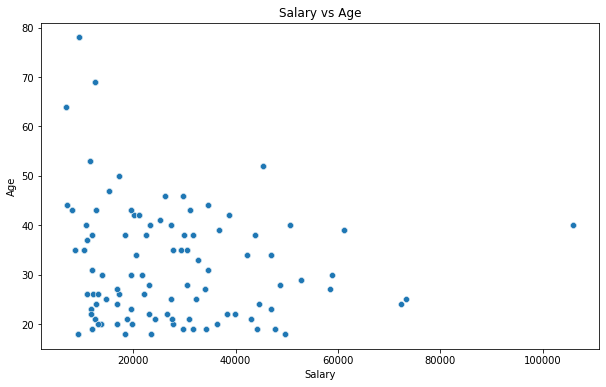

In [238]:
# Let's use scatterplot to view above information in detail
plt.figure(figsize = (10,6))
sns.scatterplot(x='salary', y='age', data=new_data)
plt.xlabel('Salary')
plt.ylabel('Age')
plt.title('Salary vs Age')
plt.show()

As you can see there is a negative correlation between Salary and Age as per our data.

In [239]:
# Correlation between Salary and Balance
new_data['salary'].corr(new_data['balance'])

0.28750136023576545

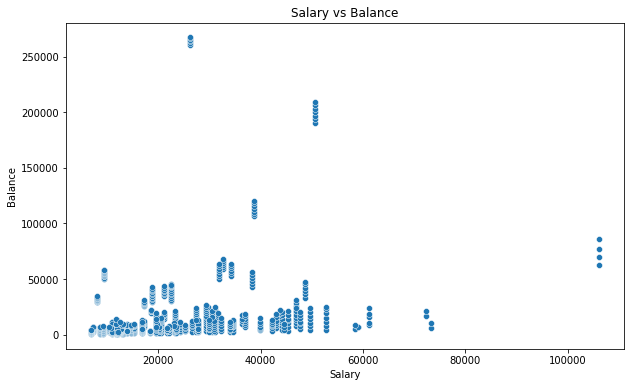

In [240]:
# Let's use scatterplot to view above information in detail
plt.figure(figsize = (10,6))
sns.scatterplot(x='salary', y='balance', data=new_data)
plt.xlabel('Salary')
plt.ylabel('Balance')
plt.title('Salary vs Balance')
plt.show()

From above analysis, it is evident that there is a little positive correlation between Salary and Balance.

In [241]:
# Correlation between Salary and Amount
new_data['salary'].corr(new_data['amount'])

1.0

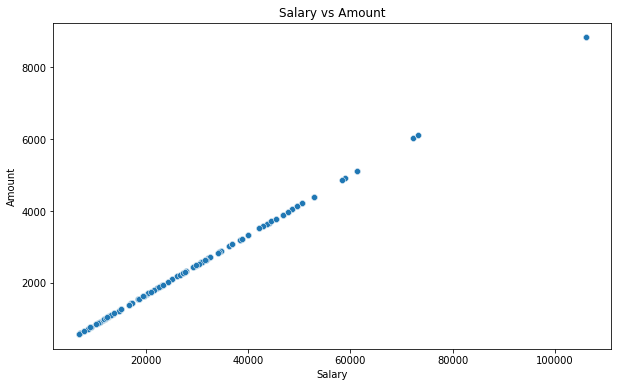

In [242]:
# Let's use scatterplot to view above information in detail
plt.figure(figsize = (10,6))
sns.scatterplot(x='salary', y='amount', data=new_data)
plt.xlabel('Salary')
plt.ylabel('Amount')
plt.title('Salary vs Amount')
plt.show()

As you can see, there is a perfect positive correlation between Salary and Amount.

In [243]:
# Salary according to Age group
new_data.groupby(['age_group'])['salary'].mean()

age_group
<20      23288.945373
20-30    23194.345143
30-40    25404.013603
40-50    20078.327812
50-60    23469.942000
>60       9686.375385
Name: salary, dtype: float64

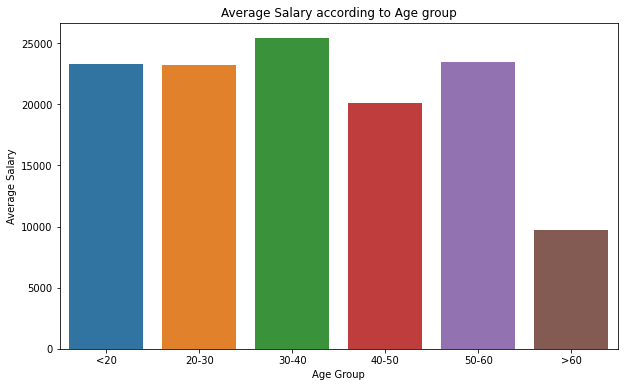

In [244]:
# Lets visualize above using a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='age_group', y='salary', data=new_data, ci=None, estimator=np.mean)
plt.xlabel('Age Group')
plt.ylabel('Average Salary')
plt.title('Average Salary according to Age group')
plt.show()

From above barplot, you can see that Age Group : 30-40 has higher average salary than the rest other Age Groups.

<h4>Data Preprocessing :</h4>

Now we will use some data pre-processing before we build our regression model.

In [245]:
new_data.head()

,account,long_lat,first_name,balance,date,gender,age,amount,transaction_id,customer_id,month,day,hour,age_group,salary
0,ACC-588564840,151.27 -33.76,Isaiah,8342.11,2018-08-01,M,23,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,August,Wednesday,11,20-30,46847.40
1,ACC-1650504218,145.01 -37.93,Marissa,2040.58,2018-08-01,F,23,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,August,Wednesday,12,20-30,19517.76
2,ACC-3326339947,151.18 -33.80,Eric,3158.51,2018-08-01,M,22,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,August,Wednesday,12,20-30,11800.32
3,ACC-3541460373,145.00 -37.83,Jeffrey,2517.66,2018-08-01,M,24,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,August,Wednesday,13,20-30,16896.96
4,ACC-2776252858,144.95 -37.76,Kristin,2271.79,2018-08-01,F,43,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,August,Wednesday,13,40-50,12816.48


In [246]:
new_data.columns

Index(['account', 'long_lat', 'first_name', 'balance', 'date', 'gender', 'age',
       'amount', 'transaction_id', 'customer_id', 'month', 'day', 'hour',
       'age_group', 'salary'],
      dtype='object')

First we will remove those columns which are not necessary for our analysis of salary.

In [247]:
Final_Data = new_data.drop(['account', 'long_lat', 'first_name', 'date', 'transaction_id', 'customer_id', 'month', 
                           'day', 'hour', 'age_group'], axis=1)

In [248]:
Final_Data.head()

,balance,gender,age,amount,salary
0,8342.11,M,23,3903.95,46847.40
1,2040.58,F,23,1626.48,19517.76
2,3158.51,M,22,983.36,11800.32
3,2517.66,M,24,1408.08,16896.96
4,2271.79,F,43,1068.04,12816.48


In [249]:
# converting gender column into numerical
Final_Data['gender'] = pd.get_dummies(Final_Data['gender'], drop_first=True)

In [250]:
Final_Data.head()

,balance,gender,age,amount,salary
0,8342.11,1,23,3903.95,46847.40
1,2040.58,0,23,1626.48,19517.76
2,3158.51,1,22,983.36,11800.32
3,2517.66,1,24,1408.08,16896.96
4,2271.79,0,43,1068.04,12816.48


In [251]:
Final_Data.dtypes

balance    float64
gender       uint8
age          int64
amount     float64
salary     float64
dtype: object

In [252]:
# Divide data into X and y
X = Final_Data.drop(['salary'], axis=1)
y = Final_Data['salary']

In [253]:
# Now we need to scale our data as some column has higher values than other.
SS = StandardScaler()

In [254]:
X_scaled = SS.fit_transform(X)

In [255]:
X_scaled

array([[-0.2553917 ,  0.95027219, -0.78501317,  1.74410648],
       [-0.45908864, -1.05233007, -0.78501317, -0.2367965 ],
       [-0.42295155,  0.95027219, -0.86651424, -0.79617087],
       ...,
       [-0.15714536,  0.95027219,  2.96403621, -0.74419268],
       [-0.15478305, -1.05233007, -1.02951639, -0.43770751],
       [ 0.11800534,  0.95027219, -1.11101747,  0.64453646]])

In [256]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [257]:
# Check the shapes of each data
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(662, 4) (221, 4)
(662,) (221,)


<h4>Linear regression Model:</h4>

In [258]:
# Create an instance of Linear regression 
reg = LinearRegression()

In [259]:
# fit training data
reg.fit(X_train, y_train)

LinearRegression()

In [260]:
# Check model score
reg.score(X_train, y_train)

1.0

In [261]:
# Predict on the test data
sal_pred = reg.predict(X_test)

In [262]:
# Check accuracy using r2 score
r2_score(y_test, sal_pred)

1.0

In [263]:
# Lets compare the actual and predicted data
compare = pd.DataFrame({'Actual':y_test, 'Predicted':sal_pred})
compare

,Actual,Predicted
44,38775.12,38775.12
806,16896.96,16896.96
720,47729.52,47729.52
660,12025.56,12025.56
878,13186.92,13186.92
...,...,...
528,15269.64,15269.64
244,27364.32,27364.32
449,49586.76,49586.76
158,34081.80,34081.80


From above analysis, you can see that Linear regression model has 100% accuracy on both train and test data.

<h4>Decision Tree Regressor :</h4>

In [264]:
# Create and instance of Decision Tree Regressor
dt = DecisionTreeRegressor()

In [265]:
# fit training data
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [266]:
# Check the model score
dt.score(X_train, y_train)

1.0

In [267]:
# Predict on the test data
dt_pred = dt.predict(X_test)

In [268]:
# Check accuracy using r2 score
r2_score(y_test, dt_pred)

1.0

In [269]:
# Let's compare the actual and predicted values
dt_compare = pd.DataFrame({'Actual':y_test, 'Predicted':dt_pred})
dt_compare

,Actual,Predicted
44,38775.12,38775.12
806,16896.96,16896.96
720,47729.52,47729.52
660,12025.56,12025.56
878,13186.92,13186.92
...,...,...
528,15269.64,15269.64
244,27364.32,27364.32
449,49586.76,49586.76
158,34081.80,34081.80


From above analysis, you can see that Decision Tree regressor model has 100% accuracy on train and 99.97% on the test data.

<h4>As you can see from above anlaysis that we can use either Linear Regression Model or Decision Tree Regressor Model as both of them performed very well on train and the test data.</h4>